# Mathcing Impulse Response Functions to Empirics 

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Data](#toc0_)

**Load data:**

In [2]:
# Load data from csv file '.xlsx'
empirical_IRF = pd.read_csv('data/empirical_IRF.csv')

display(empirical_IRF)




,Variable,Time,Shock,Median,Lower,Upper
0,log(GDP),0,ForeignDemand,5.397396e-01,0.465209,0.614988
1,log(GDP),0,GovSpending,1.601517e-01,0.078125,0.241017
2,log(GDP),0,IntRate,-1.708129e-01,-0.292146,-0.024131
3,log(GDP),0,OilPrice,-1.012910e-02,-0.024260,0.003141
4,log(GDP),1,ForeignDemand,2.416250e-01,0.121660,0.385166
...,...,...,...,...,...,...
1503,POIL,20,OilPrice,-2.516516e-07,-0.000326,0.000283
1504,POIL,21,OilPrice,-3.609448e-07,-0.000246,0.000187
1505,POIL,22,OilPrice,-1.604693e-08,-0.000148,0.000129
1506,POIL,23,OilPrice,1.813119e-06,-0.000068,0.000113


**Plot response to shocks:**

Variable types:
['log(GDP)' 'log(C)' 'log(IM)' 'log(IBx)' 'log(Ibol)' 'log(EX)' 'log(G)'
 'MarkovUgap' 'MarkovLSupply' 'log(PC)' 'log(PY)' 'log(W_rel)' 'log(W)'
 'log(Wp)' 'log(PBol)' 'log(PEX)' 'Sentiment' 'RF' 'PF' 'YF' 'POIL']
Shock types:
['ForeignDemand' 'GovSpending' 'IntRate' 'OilPrice' 'LaborSupply']


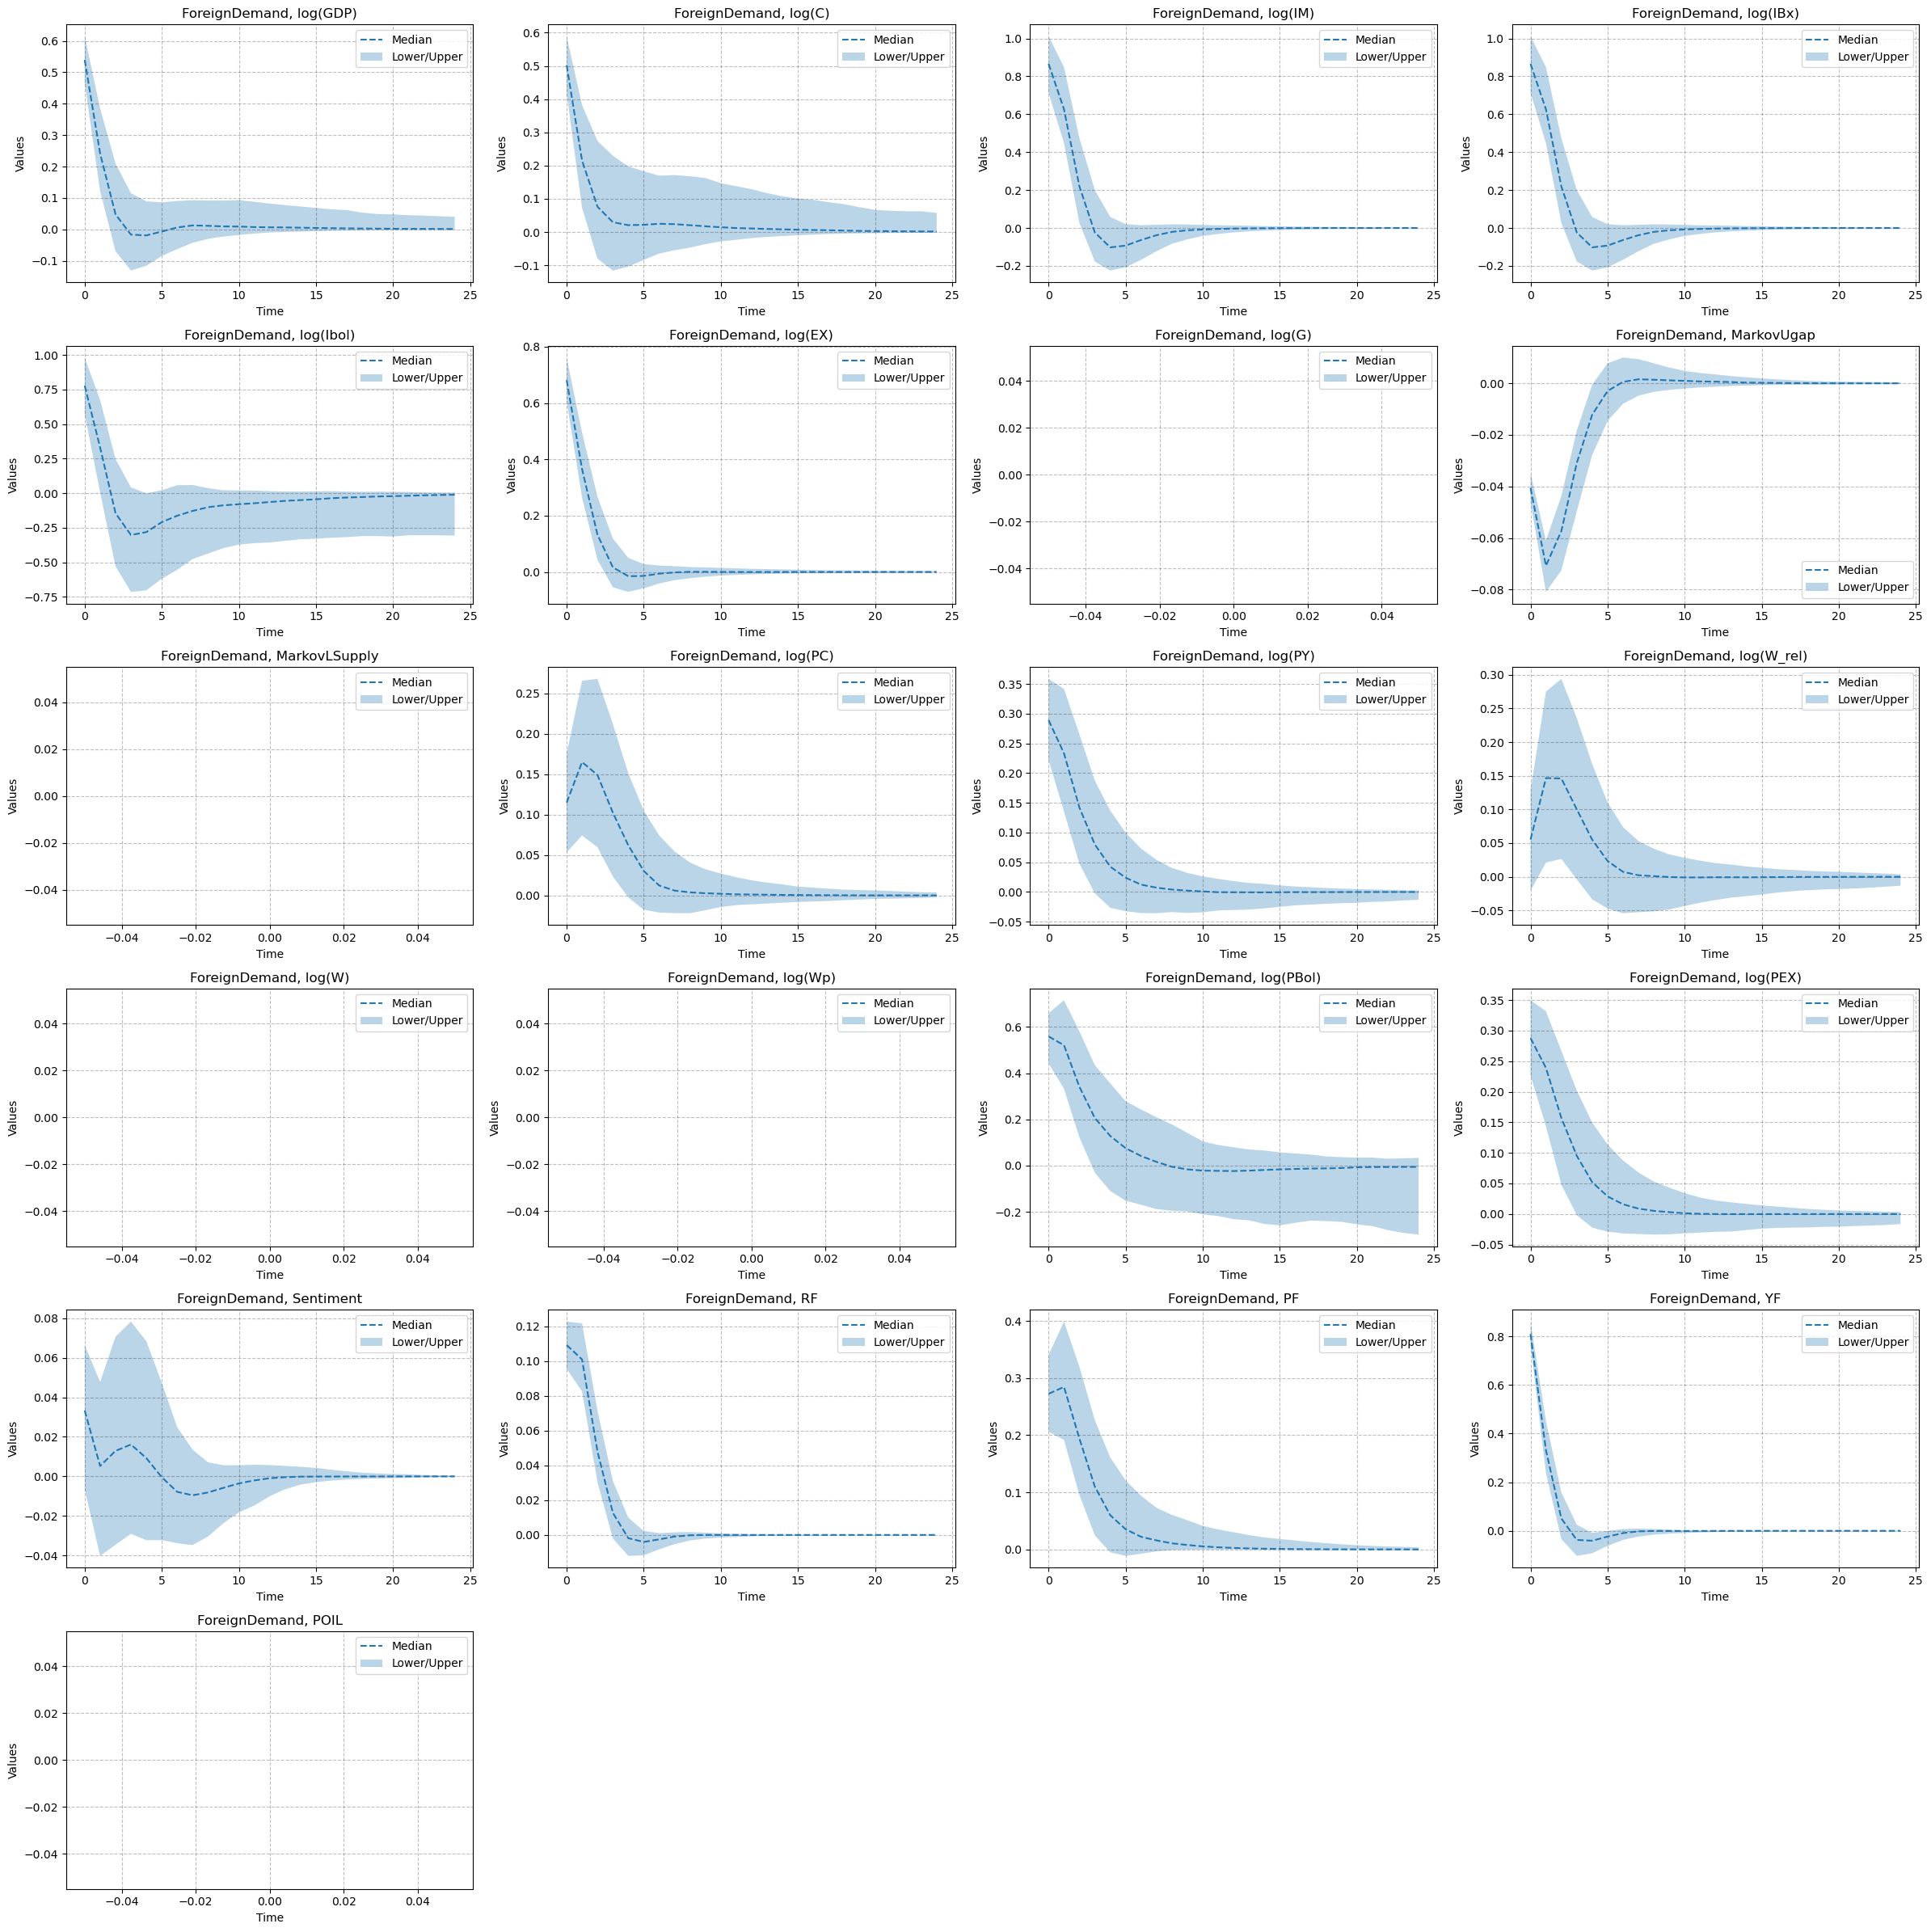

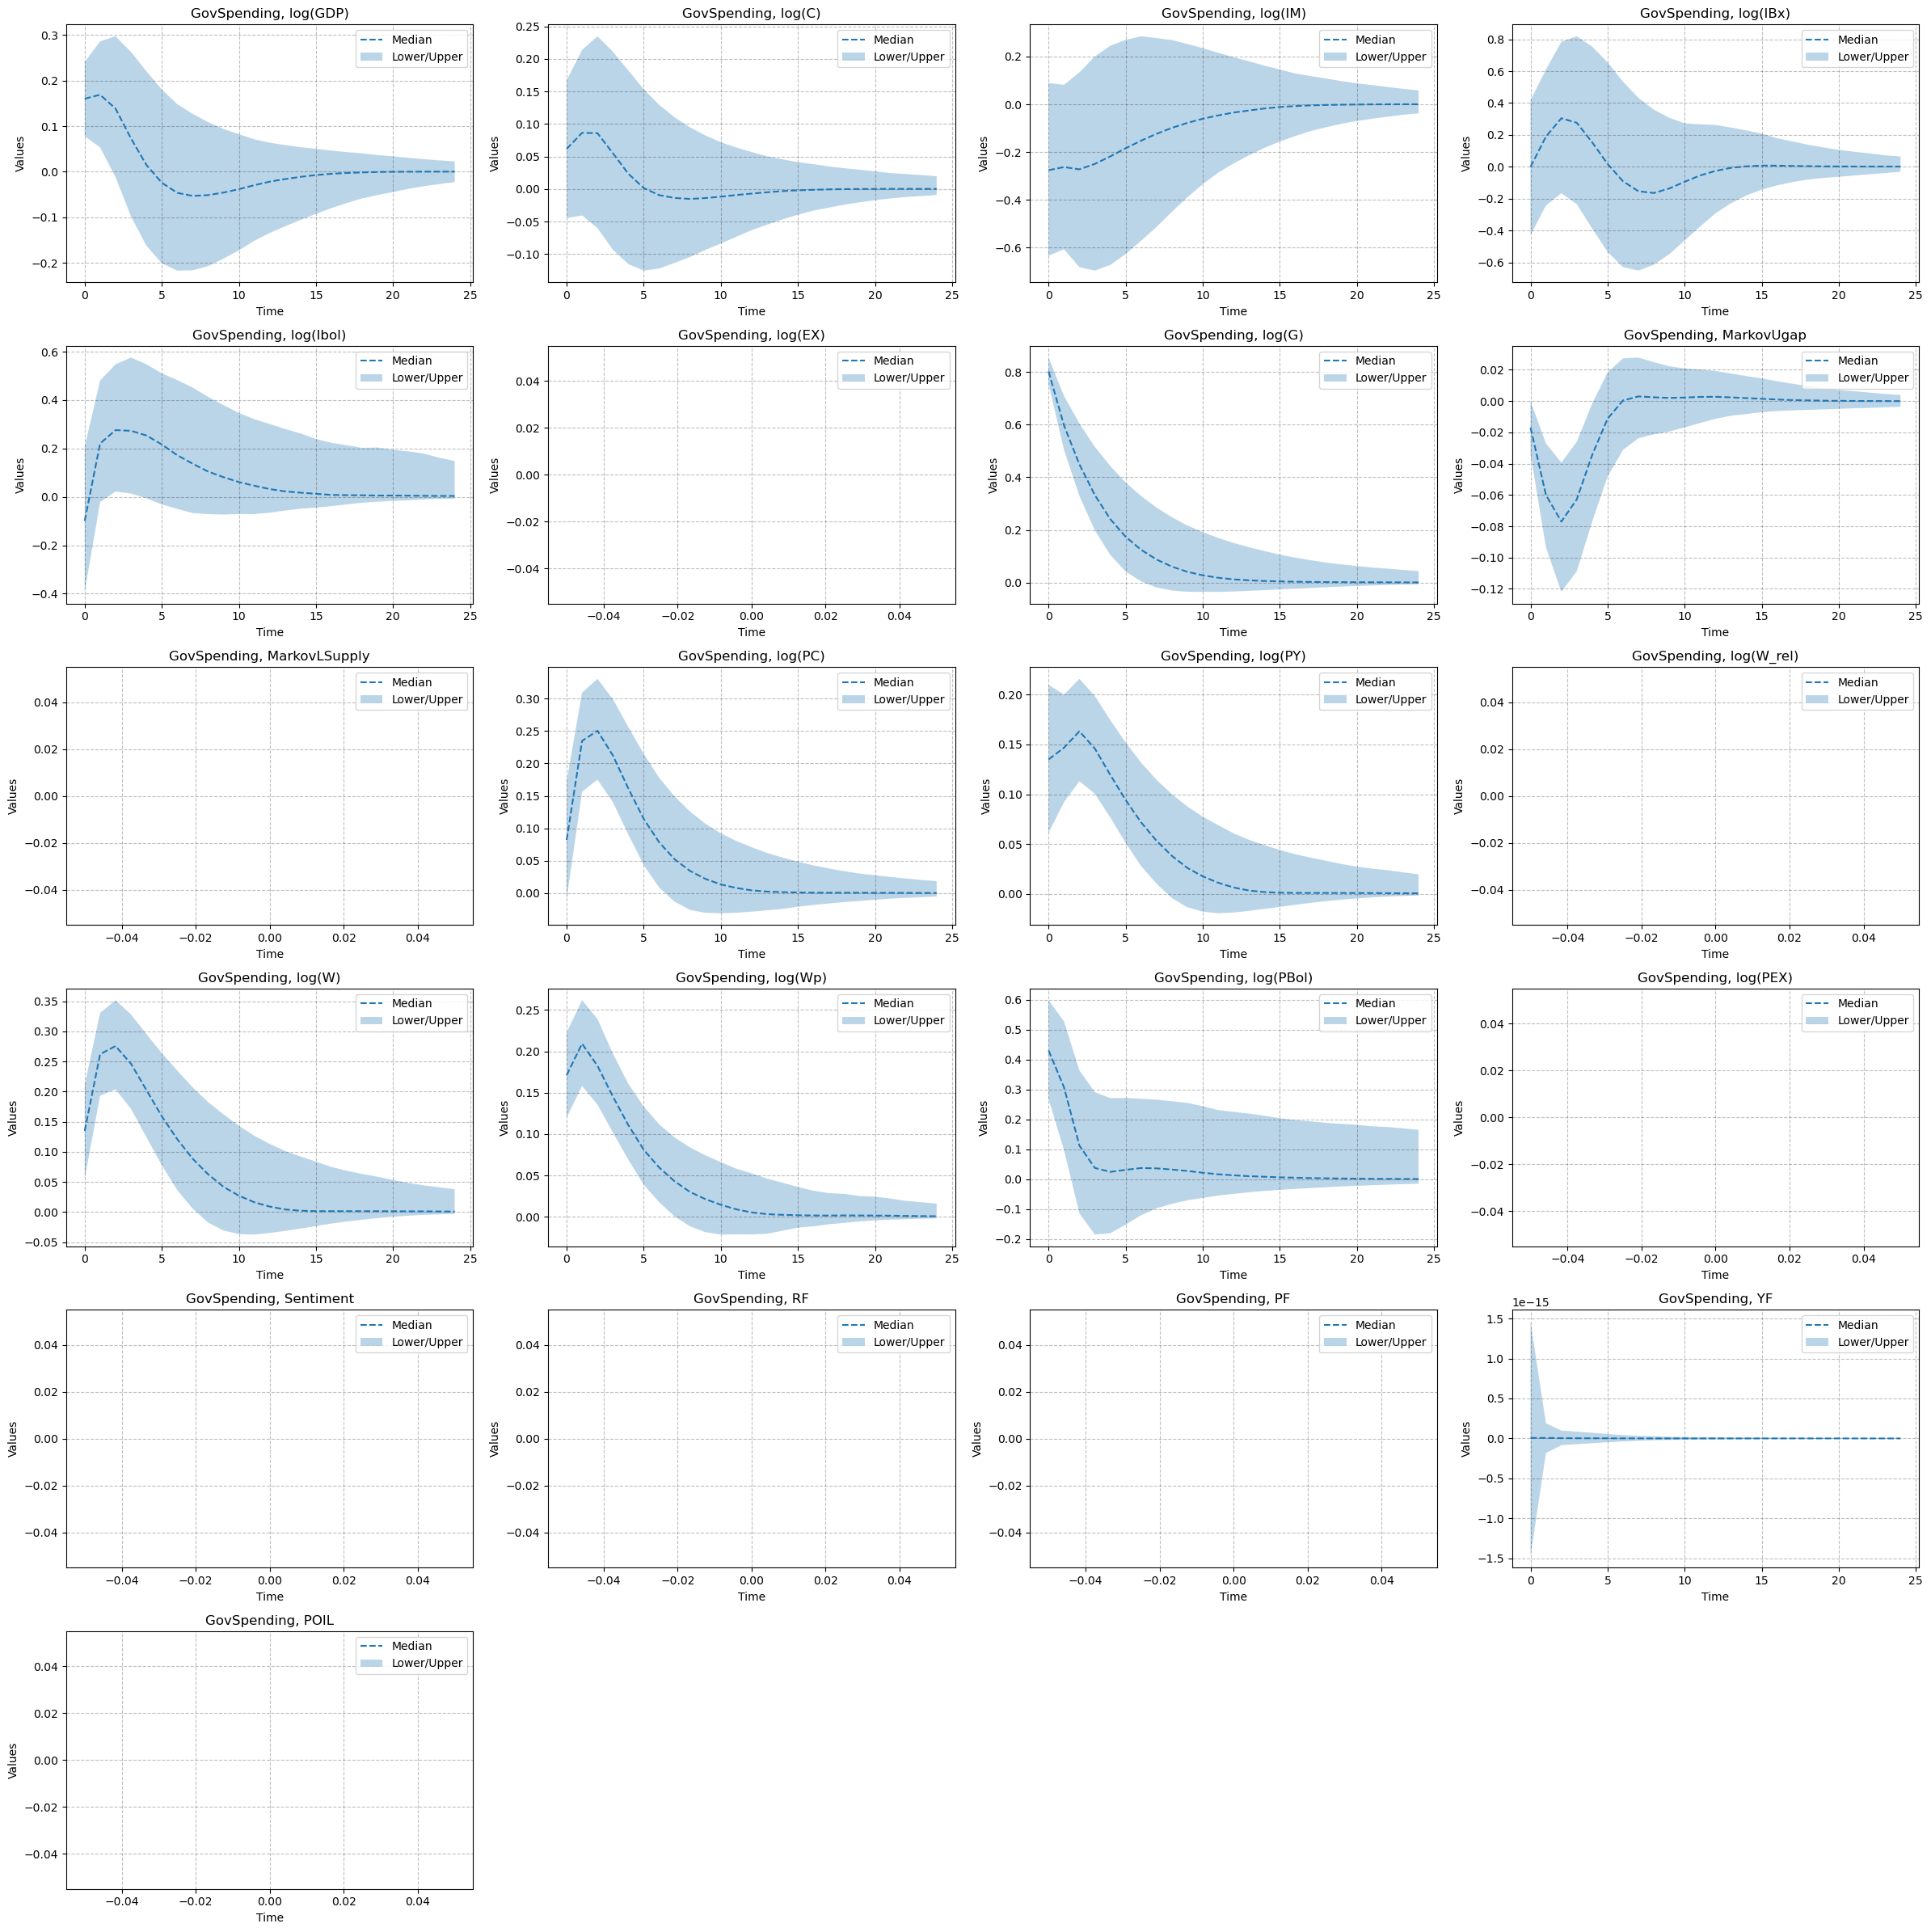

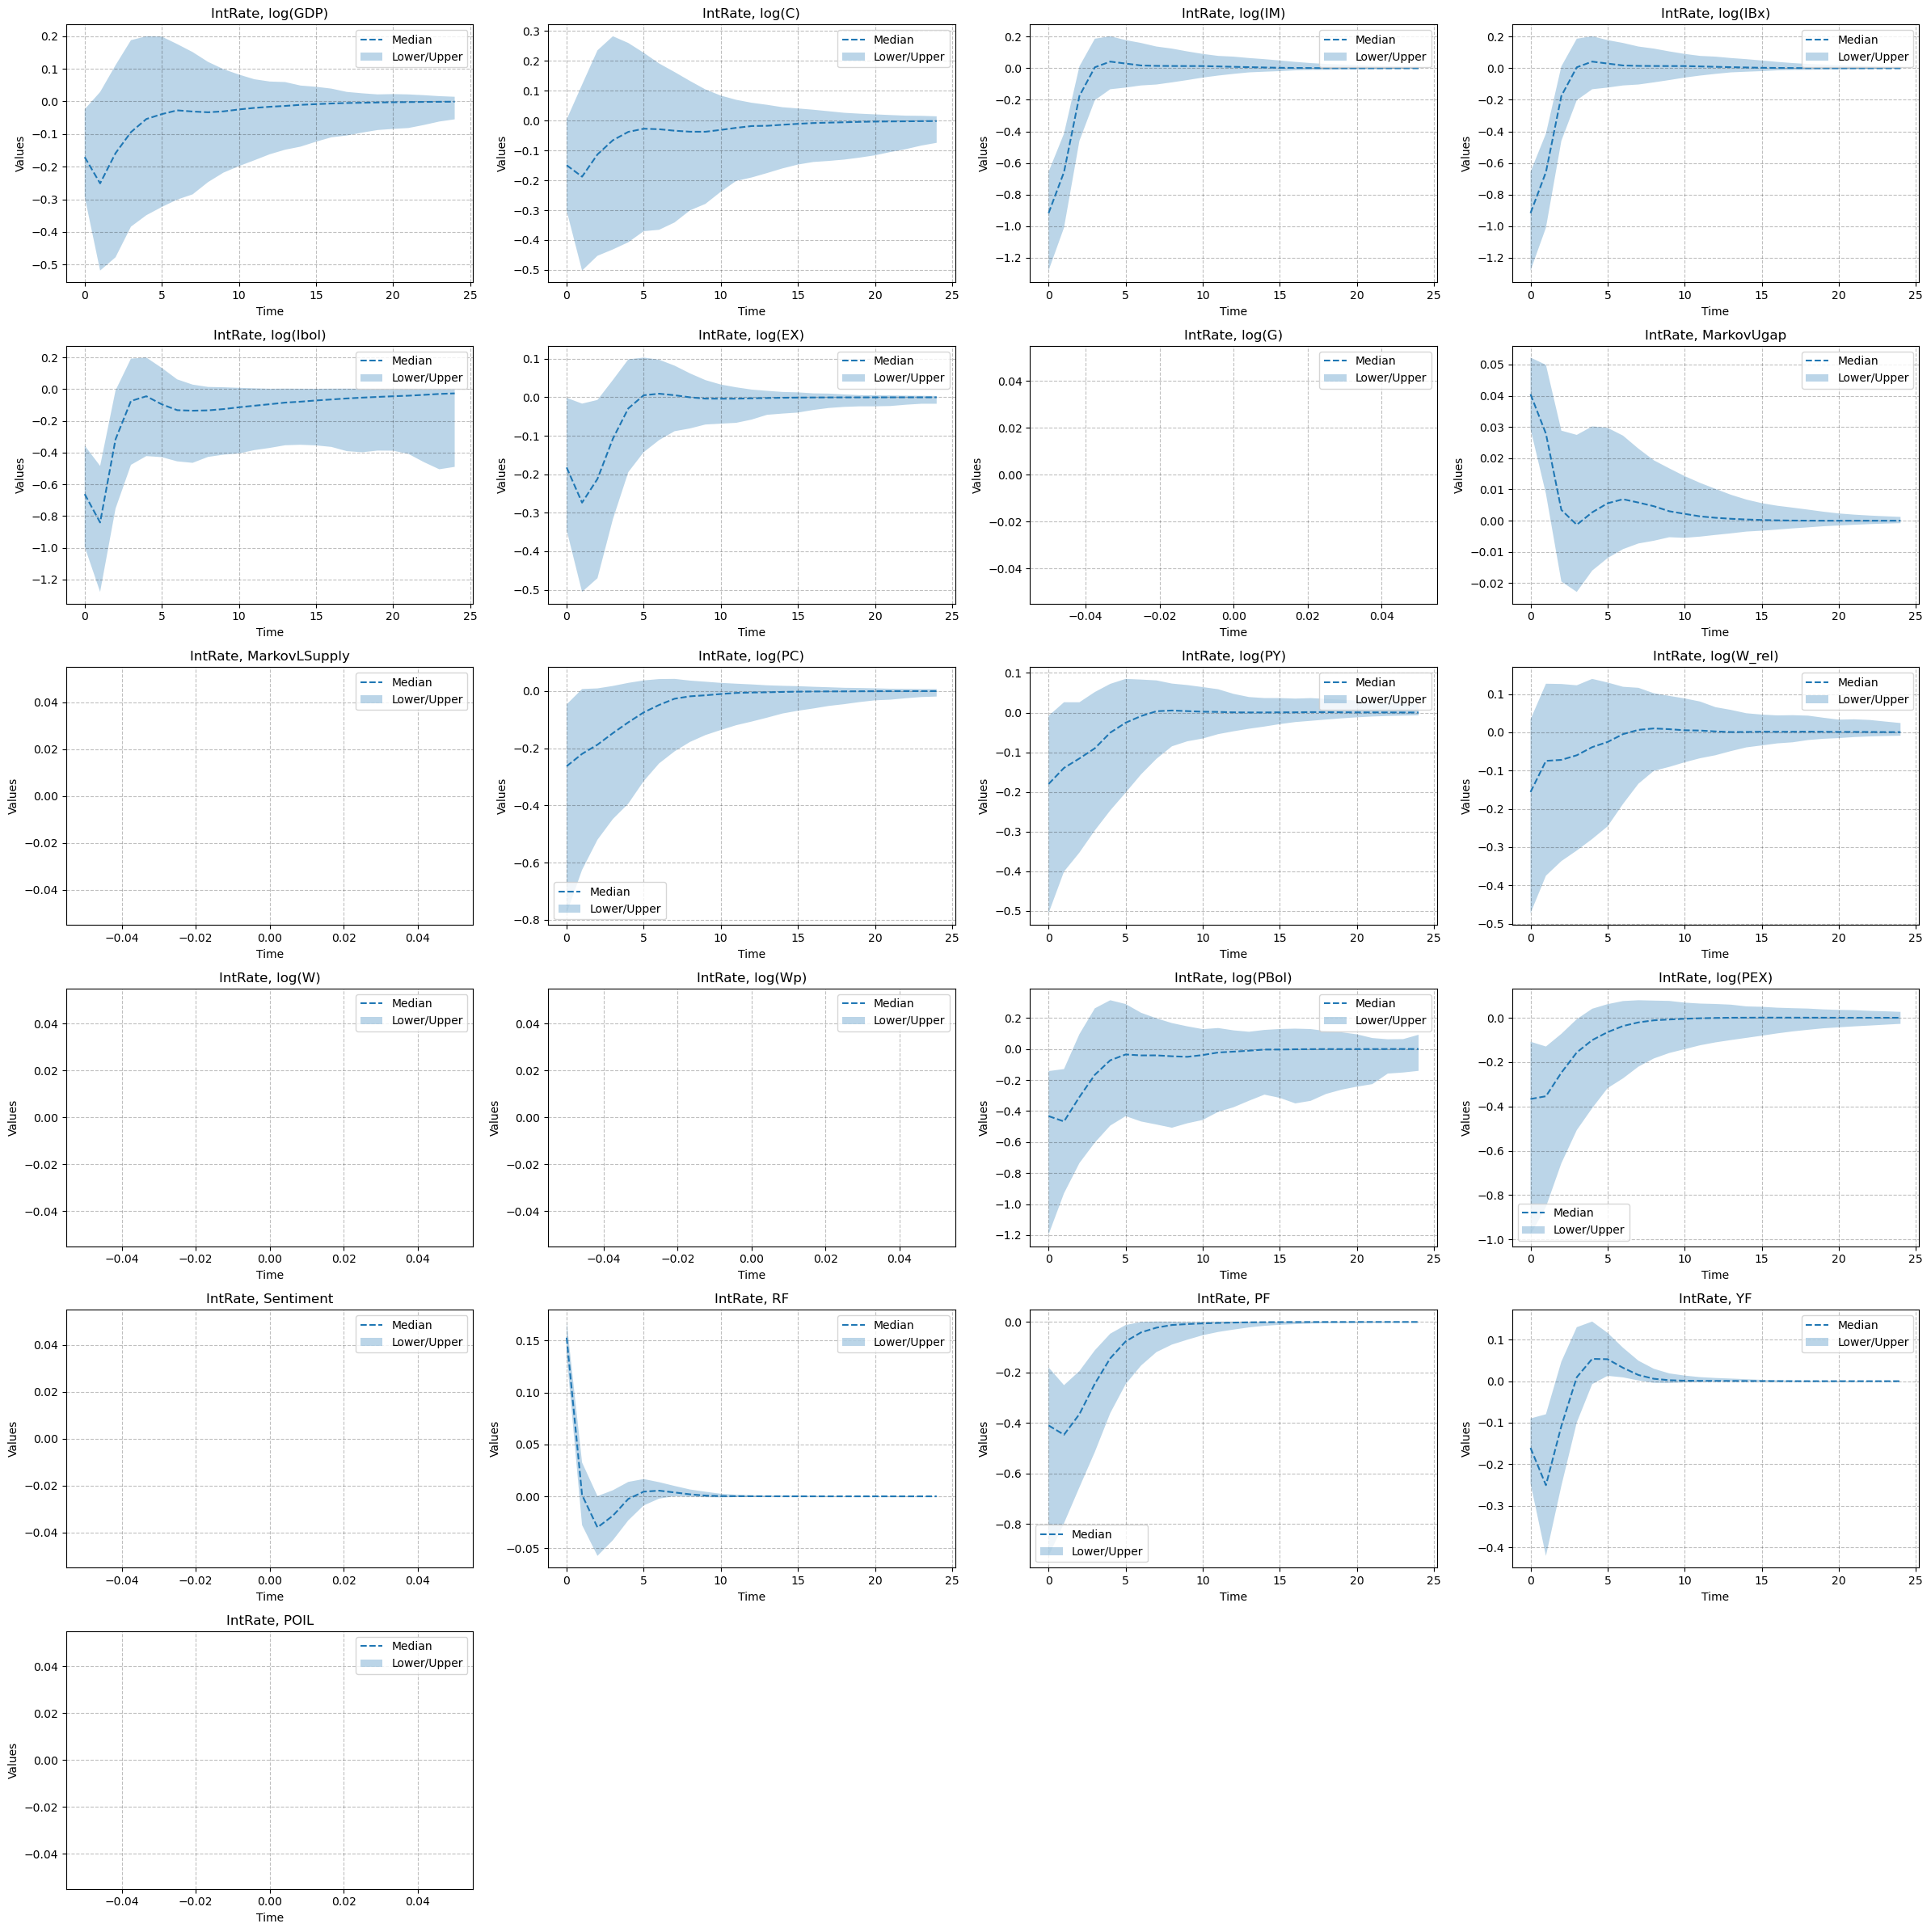

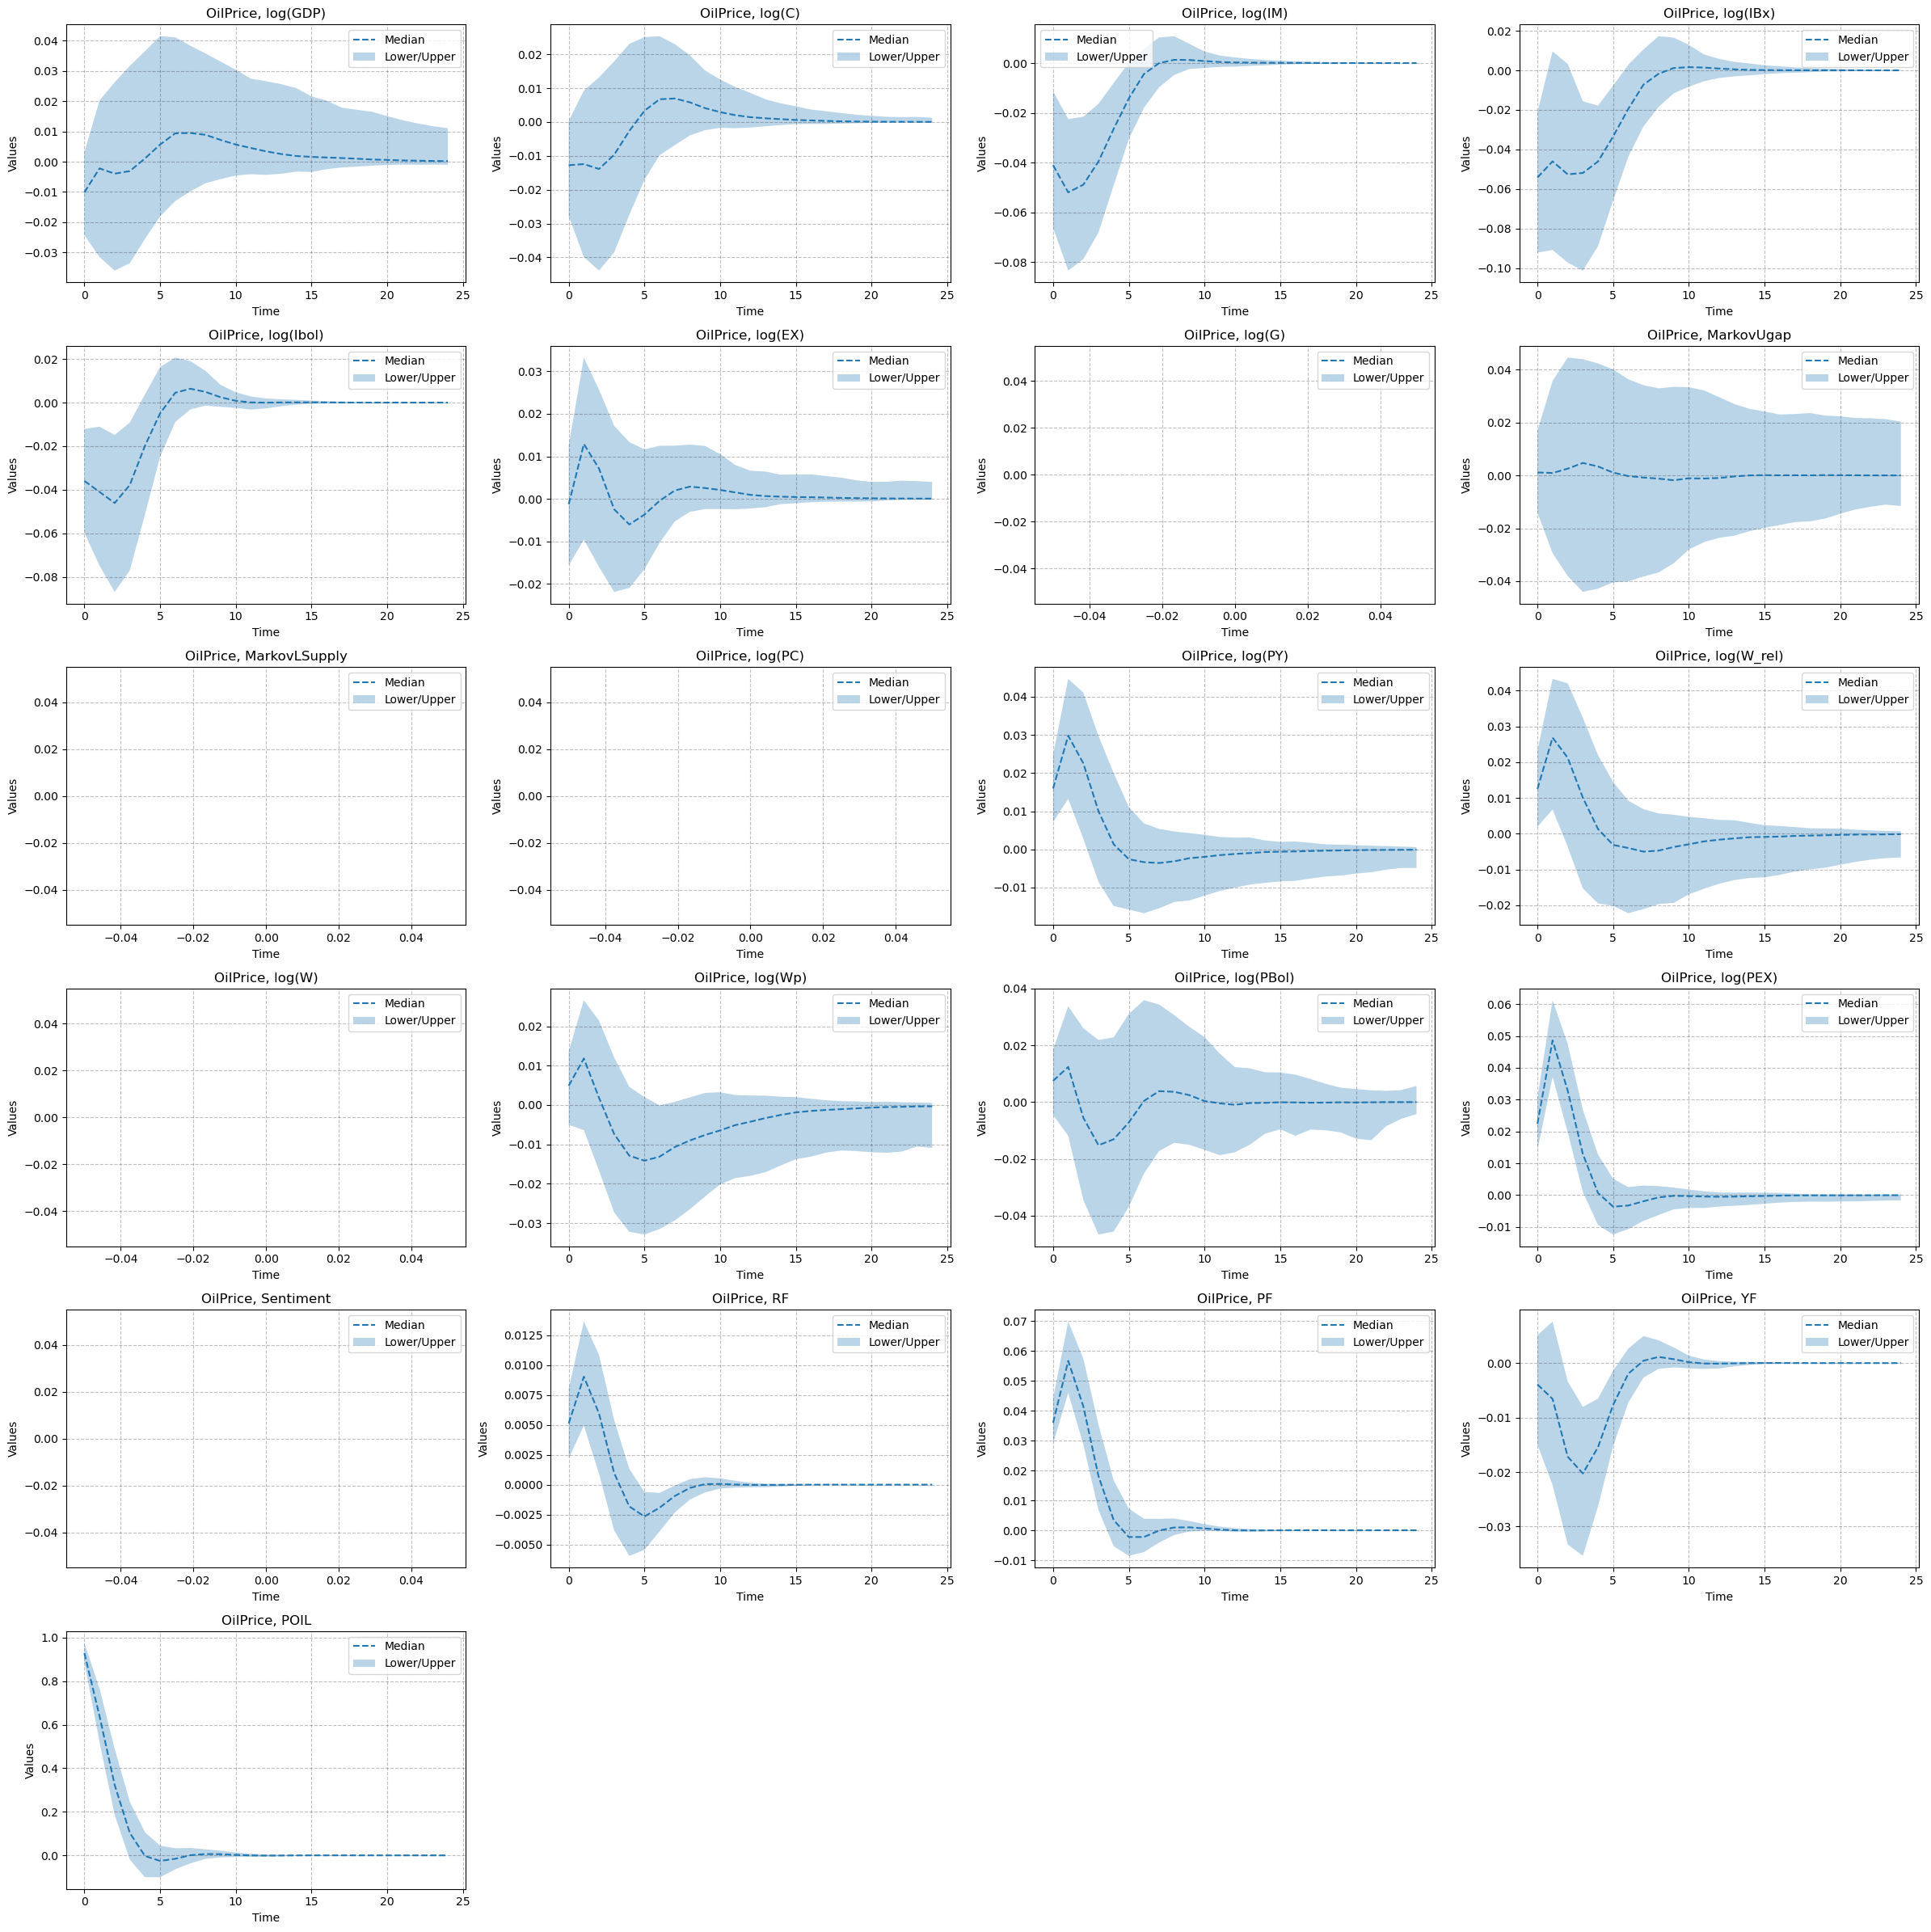

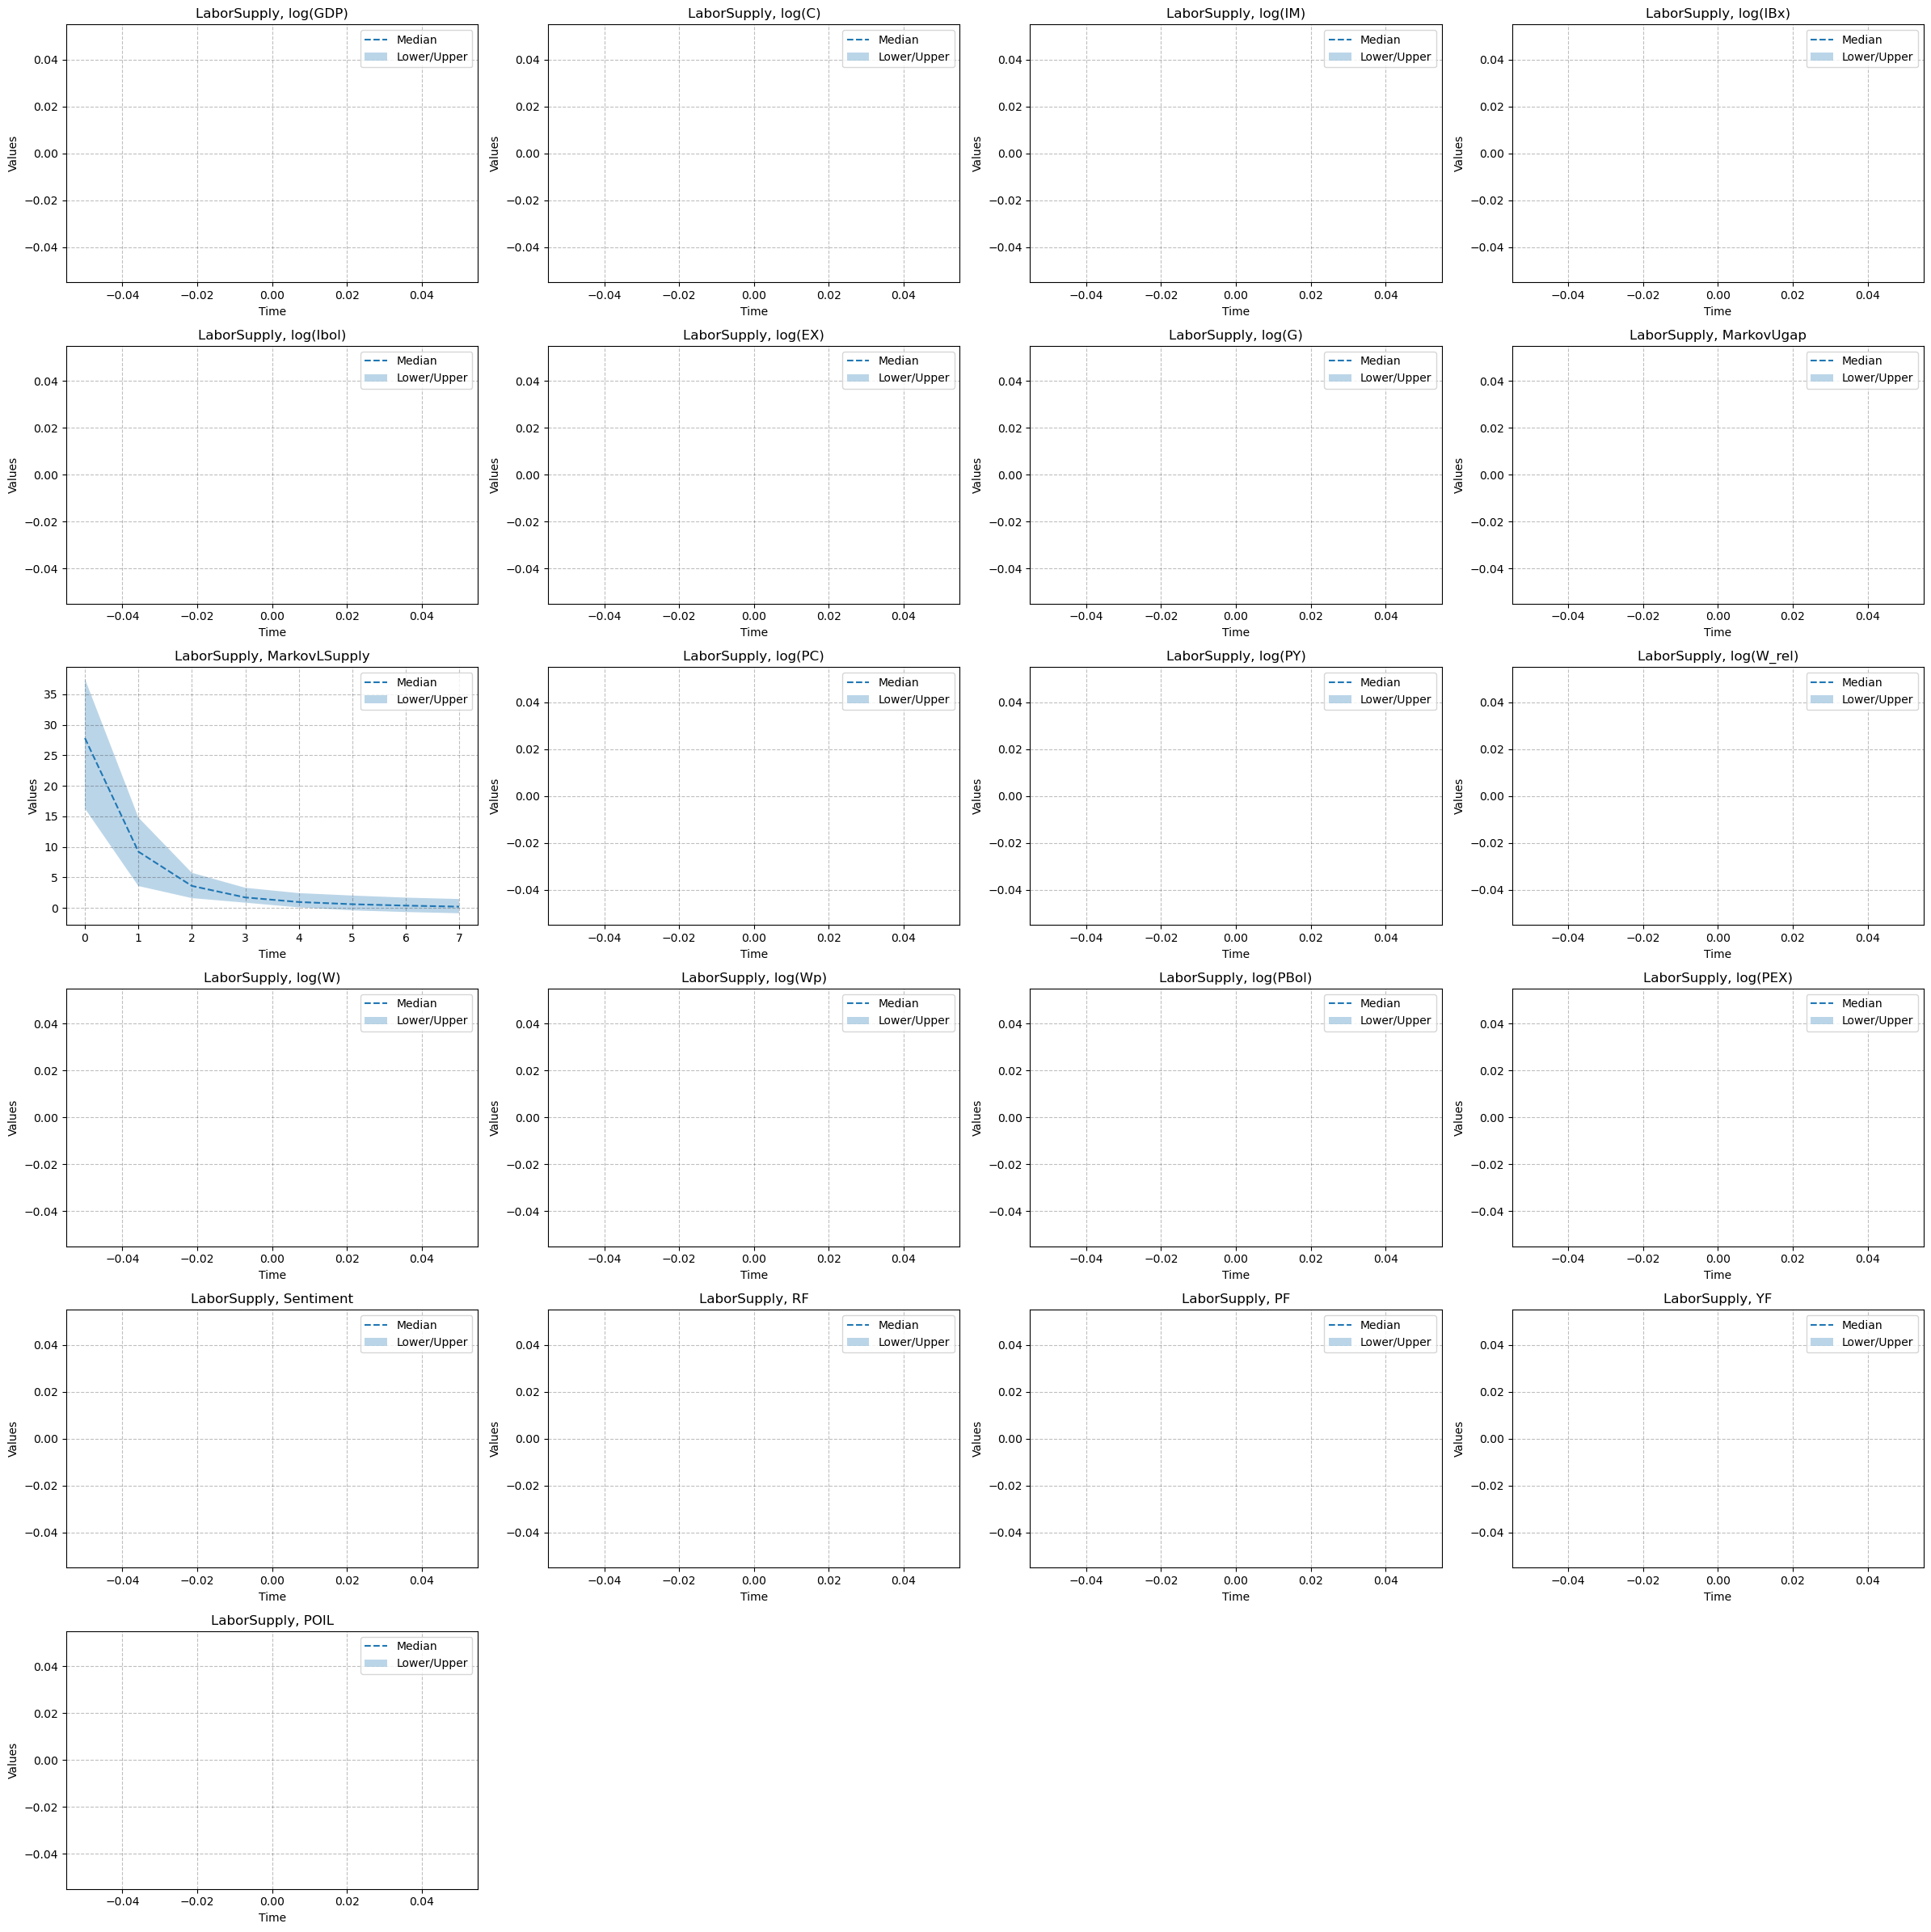

In [3]:
# Show different variables and shocks
variables = empirical_IRF['Variable'].unique()
shocks = empirical_IRF['Shock'].unique()

# Print the variables and shocks
print("Variable types:")
print(variables)
print("Shock types:")
print(shocks)

#Plot
ncol = 4
nrow = int(np.ceil(len(variables) / ncol)) 

# Loop through each shock type
for shock_type in shocks:
    plt.figure(figsize=(ncol * 6, nrow * 4))

    # Loop through each variable and plot the IRF
    for i, variable_type in enumerate(variables):
        shock_IRF = empirical_IRF[(empirical_IRF['Shock'] == shock_type) & (empirical_IRF['Variable'] == variable_type)]

        ax = plt.subplot(nrow, ncol, i + 1)

        plt.plot(shock_IRF['Time'], shock_IRF['Median'], linestyle='--', label='Median')
        plt.fill_between(shock_IRF['Time'], shock_IRF['Lower'], shock_IRF['Upper'], alpha=0.3, label='Lower/Upper')

        plt.xlabel('Time')
        plt.ylabel('Values')
        plt.title(f'{shock_type}, {variable_type}')
        plt.legend()


    plt.tight_layout()
    plt.show()

